## Neural network tutorial 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


### Creating a neural network from scratch using numpy functions. 

In [2]:
## Digit recognition
data_train=pd.read_csv(r'C:\Users\Bowen\PycharmProjects\Machine learning\Digit_dataset\train.csv')
data_test=pd.read_csv(r'C:\Users\Bowen\PycharmProjects\Machine learning\Digit_dataset\test.csv')
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_train_array=np.array(data_train)
data_test_array=np.array(data_test)
np.random.shuffle(data_train_array)
np.random.shuffle(data_test_array)

In [5]:
data_train=data_train_array.T
data_test=data_test_array.T
Batch_size=420
### Training data 
y_label_train=data_train[0]
y_train_label=y_label_train[:Batch_size]
x_train=data_train[1:,:Batch_size]


In [6]:
x_train.shape

(784, 420)

In [7]:
image=x_train[:,:36].reshape(28,28,36)
images_dat=np.array(np.split(image,36, axis=2))
images_0=np.concatenate(images_dat[0:6],axis=1)
images_1=np.concatenate(images_dat[6:12],axis=1)
images_2=np.concatenate(images_dat[12:18],axis=1)
images_3=np.concatenate(images_dat[18:24],axis=1)
images_4 = np.concatenate(images_dat[24:30],axis=1)
images_5=np.concatenate(images_dat[30:36],axis=1)
image=np.vstack((images_0,images_1,images_2,images_3,images_4,images_5))

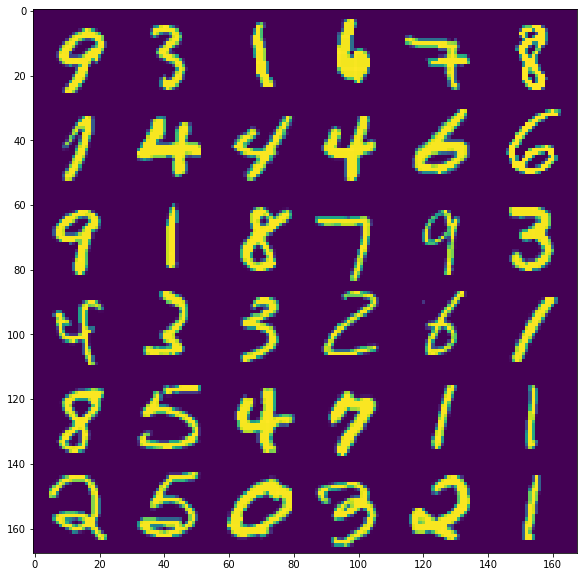

In [8]:
fig, ax= plt.subplots(1,1,figsize=(20, 10))
ax.imshow(image)
plt.show()


In [9]:
## One hot encodiing of the y label training dataset 
a = y_train_label
b = np.zeros((a.size, a.max() + 1))
b[np.arange(a.size), a] = 1

one_hot_y=b
actual_label=np.argmax(one_hot_y,axis=1)

In [10]:
n,m= y_train_label.shape, x_train.shape

In [11]:
print(f"There are {n[0]} data labels for the training dataset")
print(f"There are {m[0]} pixels with {m[1]} training examples")

There are 420 data labels for the training dataset
There are 784 pixels with 420 training examples


In [12]:
import random
class layer_dense:
    def __init__(self, no_of_neurons,input_size,activation=None):
        self.seed=random.randint(0,100000)
        np.random.seed(self.seed)
        self.weights=np.random.randn(no_of_neurons,input_size)
        self.biases=np.random.randn(no_of_neurons,1)
        self.activation=activation
        
    def forward_pass(self,inputs):
        self.inputs=inputs
        linear_output=np.dot(self.weights,self.inputs)+self.biases
        if self.activation == "ReLU":
            activation_output = np.maximum(0, linear_output)
        elif self.activation == "tanh":
            activation_output = np.tanh(np.array(linear_output,dtype=np.float64))
        elif self.activation == "sigmoid":
            activation_output = 1 / (1 + np.exp(-linear_output))
        elif self.activation == "softmax":
            exp_scores = np.exp(linear_output)
            activation_output = exp_scores / np.sum(exp_scores, axis=0)
        else:
            activation_output = linear_output
        
        return activation_output
    
    def backward_prop(self, output_grad, learn_rate):
        weights_grad=np.dot(output_grad, self.inputs.T)
        input_grad = np.dot(self.weights.T, output_grad)
        self.weights=self.weights-learn_rate*weights_grad
        self.biases=self.biases-learn_rate*output_grad
        return input_grad

def cross_entropy_loss(target, predictions):
    inter=-target.T*np.log(predictions)
    loss = np.sum(inter)/target.shape[0]
    return loss

In [13]:
input_size = 784
hidden_size_1 = 100  ## Neurons in the first hidden layer
hidden_size_2 = 50  ## Neurons in the second hidden layer
output_size = 10    ## The number of neurons in the output layer for MNST classification

# Define the layers
layer1 = layer_dense(hidden_size_1, input_size, activation="ReLU")
layer2 = layer_dense(hidden_size_2, hidden_size_1, activation="tanh")
output_layer = layer_dense(output_size, hidden_size_2, activation="softmax")

# Forward pass through the network
hidden1_output = layer1.forward_pass(x_train)
hidden2_output=layer2.forward_pass(hidden1_output)
final_output = output_layer.forward_pass(hidden2_output)

In [14]:
res=final_output[:,:]
choice=np.argmax(res,axis=0)
print(choice[:15]), print(actual_label[:15])

[2 9 2 6 2 1 6 9 6 6 6 7 2 8 8]
[9 3 1 6 7 8 1 4 4 4 6 6 9 1 8]


(None, None)

In [15]:
loss = cross_entropy_loss(one_hot_y,res)
print("Cross entropy loss:", loss)

Cross entropy loss: 8.820973158208227


### Using Torch to classify the MNST dataset.

In [16]:
### Training data 
y_label_train=data_train[0]
c=int(data_train.shape[1]/2)
y_train_label=y_label_train[:c]
x_train=data_train[1:,:c]

## Testing data 
x_test=data_train[1:,c:]
y_test_label=data_train[0][c:]

## One hot encodiing of the y label training dataset 
ass = y_train_label
bex = np.zeros((ass.size, ass.max() + 1))
bex[np.arange(ass.size), ass] = 1

one_hot_Y=bex
actual_label=np.argmax(one_hot_Y,axis=1)

In [79]:
import torch 
import torch.nn as nn 
from torch.optim import SGD
from tqdm import trange
class Bob_net(nn.Module):
    def __init__(self, no_of_neuron_layer1, no_of_neuron_layer2, output_size):
        super(Bob_net,self).__init__()
        self.layer1=nn.Linear(784,no_of_neuron_layer1)
        self.act1=nn.ReLU()
        self.layer2=nn.Linear(no_of_neuron_layer1,no_of_neuron_layer2)
        self.act2=nn.Sigmoid()
        self.layer3=nn.Linear(no_of_neuron_layer2,output_size)
        self.act3=nn.Softmax(dim=1)
    
    def forward_pass(self, data):
        data=self.layer1(data)
        data=self.act1(data)
        data=self.layer2(data)
        data=self.act2(data)
        data=self.layer3(data)
        data=self.act3(data)
        
        return data
            
torch_network=Bob_net(100,50,10)  

In [80]:
# Testing the shape output of torch network 
result=torch_network.forward_pass(torch.tensor(x_train.T).float()).T
print(result.shape)

torch.Size([10, 21000])


In [81]:
## Training the network over some epoch 
epoch=400 
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(torch_network.parameters())
for k in (t:=trange(epoch)):
    optimizer.zero_grad()
    
    X=torch_network.forward_pass(torch.tensor(x_train.T).float())
    loss=loss_function(X,torch.tensor(y_train_label).long())
    loss.backward()
    
    optimizer.step()
    
    # Compute accuracy
    predictions = torch.argmax(X, dim=1)
    accuracy = (predictions == torch.tensor(y_train_label).long()).sum().item() / len(y_train_label)
   
    # Print loss and accuracy
    t.set_description(f"Loss:{loss.item():.2f} and accuracy is: {accuracy*100:.1f}%")
    

Loss:1.48 and accuracy is: 99.3%: 100%|██████████████████████████████████████████████| 400/400 [00:57<00:00,  6.91it/s]


In [82]:
## Testing the framework
x_test_tensor = torch.tensor(x_test.T).float()
y_test_tensor = torch.tensor(y_test_label).long()

# Set the model to evaluation mode
torch_network.eval()

# Get model predictions for the testing data
with torch.no_grad():
    predictions = torch_network.forward_pass(x_test_tensor)
    predicted_labels = torch.argmax(predictions, dim=1)

# Compute testing accuracy
accuracy = (predicted_labels == y_test_tensor).sum().item() / len(y_test_tensor)
print('Testing Accuracy: {:.2f}%'.format(accuracy * 100))

Testing Accuracy: 95.70%


<IPython.core.display.Javascript object>


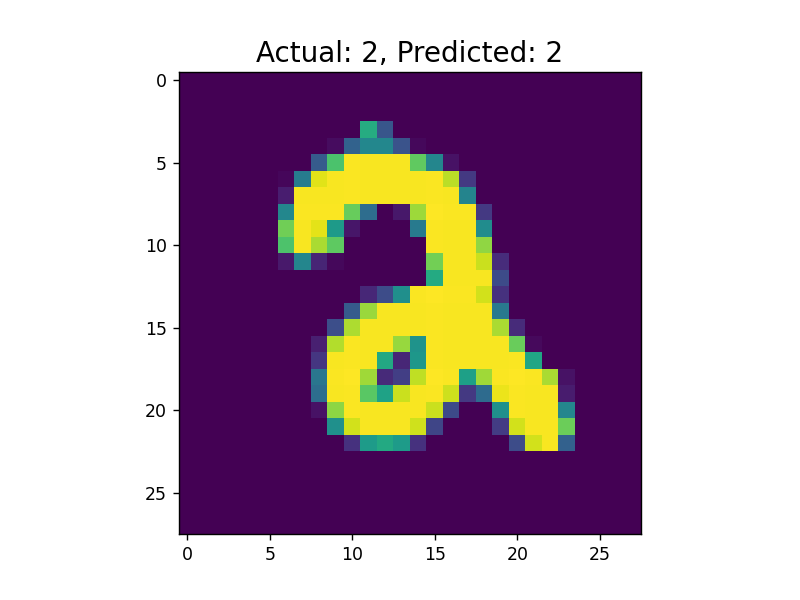

In [21]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
## Data loading for animation
Batch = 400   ## No of images or frames that the matplotlib animation needs to say 
x_images = x_test[:,:Batch].reshape(28,28,Batch)
y_image_label = y_test_tensor.numpy()
y_pred = predicted_labels.numpy()
frame_rate = 0.4   ## FPS
interval=1/frame_rate*1000
fig, ax = plt.subplots()

def update(frame):
    label = y_image_label[frame]
    pred = y_pred[frame]
    ax.imshow(x_images[:,:,frame])
    ax.set_title(f"Actual: {label}, Predicted: {pred}", fontsize=16)
 


anim = FuncAnimation(fig, update, frames=Batch, interval=interval)
plt.show()

In [86]:
### Images that the neural network got wrong

bool=predicted_labels != y_test_tensor
x_bad=x_test_tensor[bool]
shape=x_bad.shape[0]
x_bad=x_bad.T.reshape(28,28,shape).numpy()
images_dat=np.array(np.split(x_bad,shape, axis=2))
images_0=np.concatenate(images_dat[900:906],axis=1)
images_1=np.concatenate(images_dat[671:677],axis=1)
images_2=np.concatenate(images_dat[141:147],axis=1)
images_3=np.concatenate(images_dat[130:136],axis=1)
images_4 = np.concatenate(images_dat[24:30],axis=1)
images_5=np.concatenate(images_dat[80:86],axis=1)
image=np.vstack((images_0,images_1,images_2,images_3,images_4,images_5))

plt.imshow(image)
plt.show()


TypeError: Scalar tensor has no `len()`

###  Making a neural network using Tensorflow 


In [83]:
import tensorflow as tf 
from tensorflow.keras import layers
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

class Box_net(tf.keras.Model):
    def __init__(self, no_of_neuron_layer1, no_of_neuron_layer2, output_size):
        super(Box_net, self).__init__()
        self.layer1 = layers.Dense(no_of_neuron_layer1, activation='ReLU')
        self.layer2 = layers.Dense(no_of_neuron_layer2, activation='sigmoid')
        self.layer3 = layers.Dense(output_size, activation='softmax')

    def call(self, inputs):
        x = self.layer1(inputs) 
        x = self.layer2(x)
        x = self.layer3(x)
        return x

tensorflow_network = Box_net(100, 50, 10)


In [84]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
tf_network_optimizer = tf.keras.optimizers.Adam()
tensorflow_network.compile(optimizer=tf_network_optimizer, loss=loss_fn)
for p in (l:=trange(epoch)):
    optimizer.zero_grad()

    with tf.GradientTape() as tape:
        X = tensorflow_network.call(tf.constant(x_train.T, dtype=tf.float32))
        loss = loss_fn(tf.constant(y_train_label, dtype=tf.int32), X)

    gradients = tape.gradient(loss, tensorflow_network.trainable_variables)
    tf_network_optimizer.apply_gradients(zip(gradients, tensorflow_network.trainable_variables))

    # Compute accuracy
    predictions = tf.argmax(X, axis=1)
    accuracy = tf.reduce_sum(tf.cast(predictions == tf.constant(y_train_label, dtype=tf.int64), tf.float32)) / len(y_train_label)

    # Print loss and accuracy
    # print(f"Loss:{loss:.2f} and accuracy is: {accuracy*100:.1f}%")
    l.set_description(f"Loss:{loss:.2f} and accuracy is: {accuracy*100:.1f}%")

Loss:0.13 and accuracy is: 96.5%: 100%|██████████████████████████████████████████████| 400/400 [00:52<00:00,  7.68it/s]


In [85]:
## Testing the framework
x_test_tf_tensor = tf.constant(x_test.T, dtype=tf.float32)
y_test_tf_tensor = tf.constant(y_test_label, dtype=tf.int32)
loss=tensorflow_network.evaluate(x_test_tf_tensor, y_test_tf_tensor)

# Forward pass the test data through the model
y_pred = tensorflow_network.call(x_test_tf_tensor)

# Get the predicted labels
predicted_labels = tf.cast(tf.argmax(y_pred, axis=1),dtype=tf.int32)

# Compute testing accuracy
accuracy = np.sum((predicted_labels == y_test_tf_tensor))/ len(y_test_tf_tensor)
print('Testing Accuracy: {:.2f}%'.format(accuracy * 100))

657/657 [==============================] - 2s 2ms/step - loss: 0.2288
Testing Accuracy: 93.55%
